In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

d_p = 132e-6 #[m]
rho_p = 2650 #[kg/m^3]
rho_f = 935 #[kg/m^3]
mu_f = 44.5e-3 #[Pa-s]
g = 9.81 
y0 = [0,1e-5]
tMax = 10
nTime = 1000
percent = 90

vol = np.pi/6.0*d_p**3 #particle volume
m = vol*rho_p #particle mass
A = np.pi/4.0*d_p**2 #spherical surface area
lc = 2*m/rho_f/A
tc = np.sqrt(lc/(1-rho_f/rho_p)/g)
uc = lc/tc

def Cd(Re):
    def fun1(Re):
        return 24.0/Re
    def fun2(Re):
        return 24.0/Re*(1+0.14*Re**(0.7))
    def fun3(Re):
        return 0.445
    
    C = np.piecewise(Re,[(Re<0.1),(Re>=0.1) & (Re<1e3),(Re>=1e3)],[fun1,fun2,fun3])
    
    return C

def settling(y,t,rho_f,d,mu,uc):
    z,v = y
    dy_dt = np.zeros_like(y)
    Re = rho_f*d*v*uc/mu
    C = Cd(Re)
    dy_dt[0] = v
    dy_dt[1] = 1-C*v**2
    return dy_dt

t = np.linspace(0,tMax,nTime)
y = odeint(settling,y0,t,args=(rho_f,d_p,mu_f,uc))
z = y[:,0]
v = y[:,1]

vt = (v[-1]*uc)
print(vt)

ind = np.argwhere(v>=(percent/100*v[-1]))
tPercent = t[ind[0]]*tc
zPercent = z[ind[0]]*lc
print('The particle will reach %.1f%% of the terminal velocity after %.5g seconds and %.5g meters'%(percent,tPercent,zPercent))


#ii)








0.0003659725213483148
The particle will reach 90.0% of the terminal velocity after 0.00017746 seconds and 4.485e-08 meters


(array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
 <a list of 8 Text yticklabel objects>)

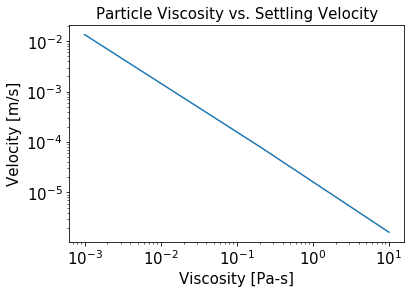

In [3]:
#b)

mu = np.linspace(1/1000,10,50) #[Pa-s]
N = len(mu)
vlist = []

for i in range(N):
    mu1 = mu[i]
    vol = np.pi/6.0*d_p**3 #particle volume
    m = vol*rho_p #particle mass
    A = np.pi/4.0*d_p**2 #spherical surface area
    lc = 2*m/rho_f/A
    tc = np.sqrt(lc/(1-rho_f/rho_p)/g)
    uc = lc/tc
    t = np.linspace(0,tMax,nTime)
    y = odeint(settling,y0,t,args=(rho_f,d_p,mu1,uc))
    z = y[:,0]
    v = y[:,1]
    vt = v[-1]*uc
    
    vlist.append(vt)
    
    

    
plt.loglog(mu, vlist)
plt.xlabel('Viscosity [Pa-s]',fontsize = 15)
plt.ylabel('Velocity [m/s]', fontsize = 15)
plt.title ('Particle Viscosity vs. Settling Velocity',fontsize = 15 )
plt.xticks (fontsize = 15)
plt.yticks (fontsize = 15)
    
